<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#caracteristiques-table" data-toc-modified-id="caracteristiques-table-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>caracteristiques table</a></span><ul class="toc-item"><li><span><a href="#departement-code-correction" data-toc-modified-id="departement-code-correction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>departement code correction</a></span></li><li><span><a href="#year-correction" data-toc-modified-id="year-correction-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>year correction</a></span></li><li><span><a href="#hrmn" data-toc-modified-id="hrmn-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>hrmn</a></span></li><li><span><a href="#create-column-day-of-the-week" data-toc-modified-id="create-column-day-of-the-week-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>create column day of the week</a></span></li><li><span><a href="#lat-and-long-format" data-toc-modified-id="lat-and-long-format-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>lat and long format</a></span></li><li><span><a href="#import-csv-with-clean-table" data-toc-modified-id="import-csv-with-clean-table-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>import csv with clean table</a></span></li></ul></li><li><span><a href="#lieux-table" data-toc-modified-id="lieux-table-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>lieux table</a></span></li><li><span><a href="#Map-of-accidents" data-toc-modified-id="Map-of-accidents-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Map of accidents</a></span></li><li><span><a href="#Les-vehicules" data-toc-modified-id="Les-vehicules-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Les vehicules</a></span><ul class="toc-item"><li><span><a href="#Premieres-analyses" data-toc-modified-id="Premieres-analyses-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Premieres analyses</a></span><ul class="toc-item"><li><span><a href="#Étude-des-NaN" data-toc-modified-id="Étude-des-NaN-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Étude des NaN</a></span></li><li><span><a href="#Étude-des-corrélations" data-toc-modified-id="Étude-des-corrélations-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Étude des corrélations</a></span></li><li><span><a href="#Categories-les-plus-redondantes-dans-chaques-colonnes" data-toc-modified-id="Categories-les-plus-redondantes-dans-chaques-colonnes-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Categories les plus redondantes dans chaques colonnes</a></span></li><li><span><a href="#Étude-des-doublons" data-toc-modified-id="Étude-des-doublons-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Étude des doublons</a></span></li><li><span><a href="#Ajout-dans-la-db" data-toc-modified-id="Ajout-dans-la-db-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Ajout dans la db</a></span></li></ul></li></ul></li><li><span><a href="#Concatenation-de-nos-dataframes" data-toc-modified-id="Concatenation-de-nos-dataframes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Concatenation de nos dataframes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ajout-de-la-table-usagers" data-toc-modified-id="Ajout-de-la-table-usagers-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Ajout de la table usagers</a></span><ul class="toc-item"><li><span><a href="#Étude-des-NaN" data-toc-modified-id="Étude-des-NaN-5.0.1.1"><span class="toc-item-num">5.0.1.1&nbsp;&nbsp;</span>Étude des NaN</a></span></li><li><span><a href="#Étude-des-doublons" data-toc-modified-id="Étude-des-doublons-5.0.1.2"><span class="toc-item-num">5.0.1.2&nbsp;&nbsp;</span>Étude des doublons</a></span></li></ul></li><li><span><a href="#Ajout-de-la-table-caractéristiques" data-toc-modified-id="Ajout-de-la-table-caractéristiques-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Ajout de la table caractéristiques</a></span><ul class="toc-item"><li><span><a href="#Étude-des-NaN" data-toc-modified-id="Étude-des-NaN-5.0.2.1"><span class="toc-item-num">5.0.2.1&nbsp;&nbsp;</span>Étude des NaN</a></span></li><li><span><a href="#Ajout-dans-la-db" data-toc-modified-id="Ajout-dans-la-db-5.0.2.2"><span class="toc-item-num">5.0.2.2&nbsp;&nbsp;</span>Ajout dans la db</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [2]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
from urllib.request import urlopen as uReq
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np


In [9]:
url = "https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/#_"

In [10]:
# function to get page soup from html page
def get_page_soup(url):
    # opening connection
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    #html parser
    return soup(page_html, "html.parser")


In [11]:
page  = get_page_soup(url)
articles = page.findAll("article")
liens = [[],[],[],[]]
names = ['caracteristiques', 'lieux', 'vehicules','usagers']
for a in articles:
    if a.div.h4 !=None:
        name = a.div.h4.text.split('-')[0].split('_')[0]
    for i, n in enumerate(names):
        if name == n:
            lien = a.footer.find("div", {"resource-card-actions btn-toolbar"}).findAll("a")[1]['href']
            liens[i].append(lien)



In [ ]:
# to create data base on your laptop, call function create_data_base,
# do not forget to create empty file with name accidents.sqlite3 in the same directory your notebook is.
def create_data_base():
#Import libraries
    import pandas as pd, csv, sqlite3

    # Create sqlite database and cursor
    conn = sqlite3.connect('accidents.sqlite3')
    c = conn.cursor()

    #c.execute("""DROP TABLE IF EXISTS caracteristiques, lieux, vehicules, usagers;""")
    c.execute("""CREATE TABLE IF NOT EXISTS caracteristiques (Num_Acc INTEGER, jour INTEGER, mois INTEGER, an INTEGER, hrmn TEXT, lum INTEGER, dep TEXT, com TEXT, agg INTEGER, int INTEGER, atm INTEGER, col INTEGER, adr TEXT, gps TEXT, lat TEXT, long TEXT)""")
    c.execute("""CREATE TABLE IF NOT EXISTS lieux (Num_Acc INTEGER, catr INTEGER, voie REAL, v1 REAL, v2 TEXT, circ REAL, nbv REAL, pr REAL, pr1 REAL, vosp REAL, prof REAL, plan REAL, lartpc REAL, larrout REAL, surf REAL, infra REAL, situ REAL, env1 REAL, vma INTEGER)""")
    c.execute("""CREATE TABLE IF NOT EXISTS vehicules (Num_Acc INTEGER, id_vehicule TEXT, senc REAL, catv INTEGER, occutc INTEGER, obs REAL, obsm REAL, choc REAL, manv REAL, num_veh TEXT, motor INTEGER)""")
    c.execute("""CREATE TABLE IF NOT EXISTS usagers (Num_Acc INTEGER, id_vehicule TEXT, place REAL, catu INTEGER, grav INTEGER, sexe INTEGER, trajet REAL, secu REAL, secu1 REAL, secu2 REAL, secu3 REAL, locp REAL, actp REAL, etatp REAL, an_nais REAL, num_veh TEXT)""")
    conn.commit()


    for i,lien in enumerate(liens): #names 0,1,2,3
        for j,l in enumerate(lien): #years 0-15
            print("fichier {} - {}".format(names[i],2019-j))
            #print(l)
            try:
                df = pd.read_csv(l, sep=';', low_memory=False) #, encoding = 'ISO-8859-1', error_bad_lines=False, quotechar='"'

                if (len(df.columns)<2):
                    df = pd.read_csv(l, sep = ',', low_memory=False)
            except:
                try:
                    print('exeption1')
                    df = pd.read_csv(l, sep = ',', encoding = 'ISO-8859-1', engine = 'python')

                except:
                    print('exeption2')
                    df = pd.read_csv(l, sep = '\t', encoding = 'ISO-8859-1', engine = 'python')

            print(df.head(1))
            df.to_sql(names[i], conn, if_exists='append', index=False)

create_data_base()

In [12]:
import pandas as pd, csv, sqlite3
conn = sqlite3.connect('accidents.sqlite3')


In [12]:
usagers = pd.read_sql_query(f"SELECT * FROM {names[3]}", conn)

usagers 

,index,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,an_nais,num_veh
0,0,201900000001,2.0,2,4,2,9.0,1.0,0.0,0,2002.0,B01
1,1,201900000001,1.0,1,4,2,5.0,1.0,0.0,0,1993.0,B01
2,2,201900000001,1.0,1,1,1,9.0,1.0,0.0,0,1959.0,A01
3,3,201900000002,1.0,1,4,2,1.0,1.0,0.0,0,1994.0,A01
4,4,201900000003,1.0,1,1,1,4.0,1.0,0.0,0.0,1996.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
2273337,2275167,200500087953,1.0,1,1,1,5.0,3.0,0.0,0.0,1972.0,B01
2273338,2275168,200500087953,1.0,1,1,1,5.0,3.0,0.0,0.0,1965.0,C01
2273339,2275169,200500087953,1.0,1,4,1,5.0,3.0,0.0,0.0,1990.0,A01
2273340,2275170,200500087954,1.0,1,4,1,1.0,3.0,0.0,0.0,1951.0,A01


In [13]:
usagers.isnull().sum()

index      0
Num_Acc    0
place      0
catu       0
grav       0
sexe       0
trajet     0
secu       0
locp       0
actp       0
an_nais    0
num_veh    0
dtype: int64

In [14]:
vehicules = pd.read_sql_query(f"SELECT * FROM {names[2]}", conn)
vehicules 

,index,Num_Acc,catv,occutc,obs,obsm,choc,manv,num_veh
0,0,201900000001,7,NaN,0.0,2.0,5.0,23.0,B01
1,1,201900000001,17,NaN,1.0,0.0,3.0,11.0,A01
2,2,201900000002,7,NaN,4.0,0.0,1.0,0.0,A01
3,3,201900000003,7,NaN,0.0,2.0,1.0,2.0,A01
4,4,201900000003,7,NaN,1.0,0.0,4.0,2.0,B01
...,...,...,...,...,...,...,...,...,...
1736516,1736516,200500087952,7,0.0,0.0,2.0,3.0,1.0,A01
1736517,1736517,200500087953,7,0.0,0.0,2.0,3.0,19.0,B01
1736518,1736518,200500087953,2,0.0,0.0,2.0,1.0,17.0,A01
1736519,1736519,200500087953,7,0.0,0.0,2.0,1.0,1.0,C01


In [15]:
from functions import *

In [16]:
info_usagers = df_info(usagers)


    Number of lines : 2273342
    Number of columns: 12
    


,name,type,n_unique,unique,null%
0,index,int64,2273342,"[0.00e+00, 1.14e+06, 2.28e+06]",0.0
1,Num_Acc,int64,1017309,"[2.01e+11, 2.01e+11, 2.02e+11]",0.0
2,place,float64,11,"[0.00e+00, 1.34e+00, 1.00e+01]",0.0
3,catu,int64,4,"[1.00e+00, 1.34e+00, 4.00e+00]",0.0
4,grav,int64,4,"[1.00e+00, 2.51e+00, 4.00e+00]",0.0
5,sexe,int64,2,"[1.00e+00, 1.33e+00, 2.00e+00]",0.0
6,trajet,float64,6,"[1.00e+00, 4.37e+00, 9.00e+00]",0.0
7,secu,float64,3,"[1.00e+00, 1.35e+00, 3.00e+00]",0.0
8,locp,float64,9,"[0.00e+00, 2.25e-01, 8.00e+00]",0.0
9,actp,object,10,"[0, 0.0, 3.0, 2.0, 1.0, 4.0, 9.0, 5.0, A, 6.0]",0.0


In [17]:
info_usagers.sort_values(by='null%', ascending= False)

AttributeError: 'NoneType' object has no attribute 'sort_values'

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
pietons = usagers[usagers['catu']!=3]
pietons['place'].unique()

array([2., 1., 3., 4., 7., 9., 6., 8., 5., 0.])

<AxesSubplot:xlabel='place', ylabel='Count'>

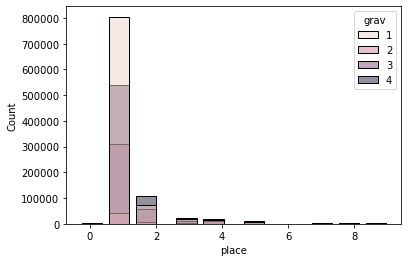

In [20]:
# mortality depending on the place in the car
sns.histplot(data = usagers[usagers['catu']!=3], x = 'place', hue = 'grav', shrink = 1.5)
#plt.xticks(locs = usagers['place'].unique())

<AxesSubplot:xlabel='place', ylabel='Count'>

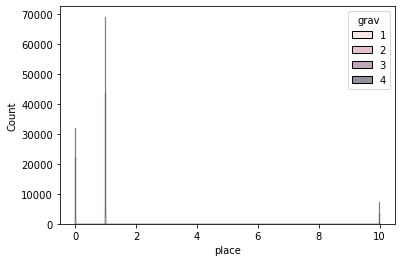

In [21]:
sns.histplot(data = usagers[usagers['catu']==3], x = 'place', hue = 'grav')


## caracteristiques table 

In [22]:
caracteristiques = pd.read_sql_query(f"SELECT Num_Acc, jour, mois, an, hrmn, lum, dep, agg, int, atm, col, lat, long FROM {names[0]} ", conn)
caracteristiques.head(2)
col_caracteristiques = ['Num_Acc', 'jour', 'mois', 'an', 'hrmn',
 'lum', 'dep', 'agg', 'int', 'atm', 'col','lat','long']
drop_caracteristiques = ['gps', 'adr', 'com']
drop_for_model = ['jour', 'mois', 'an', 'lat', 'long', 'dep']

### departement code correction 

For the years 2005-2018 departments are writen with number ending by zero
for the year 2019 the new coding is used 201 -> 2A, 202 -> 2B, 600 ->60 ect..
Changing all codes to format geo data (Code ISO 3166-1)

In [23]:
new_values = \
['01', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 
 '02', '21', '22', '23', '24', '25', '26', '27', '28', '29', 
 '2A', '2B', 
 '03', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', 
 '04', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
 '05', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', 
 '06', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', 
 '07', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', 
 '08', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', 
 '09', '90', '91', '92', '93', '94', '95', 
 'QP', 'MQ', 'GF', 'RE', 'YT']
no_geo = ['975', '977','978', '986', '987', '988']
print(len(new_values))

101


In [24]:
old_values = \
['10', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', 
 '20', '210', '220', '230', '240', '250', '260', '270', '280', '290', 
 '201', '202', 
 '30', '300', '310', '320', '330', '340', '350', '360', '370', '380', '390', 
 '40', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490', 
 '50', '500', '510', '520', '530', '540', '550', '560', '570', '580', '590', 
 '60', '600', '610', '620', '630', '640', '650', '660', '670', '680', '690', 
 '70', '700', '710', '720', '730', '740', '750', '760', '770', '780', '790', 
 '80', '800', '810', '820', '830', '840', '850', '860', '870', '880', '890', 
 '90', '900', '910', '920', '930', '940', '950',
 '971', '972', '973', '974', '976']

print(len(old_values))

101


In [25]:
caracteristiques.dep = caracteristiques.dep.replace(old_values, new_values)

In [26]:
caracteristiques.dep.unique()

array(['93', '92', '94', '87', '69', '38', '34', '13', '988', 'YT', 'RE',
       'MQ', '2B', '91', '86', '83', '08', '78', '77', '76', '72', '71',
       '67', '66', '64', '06', '51', '05', '49', '45', '37', '35', '33',
       '31', '03', '29', '22', '19', '18', '17', '74', '81', '2', '59',
       '95', '63', '62', 'GF', '2A', '84', '9', '73', '43', '01', '36',
       '16', '7', '21', '04', '24', '4', '85', '27', '28', '52', '68',
       '42', '82', '11', '987', '44', '61', '14', '56', '58', '54', '47',
       '41', '3', '75', '1', '57', '32', '39', '15', '23', '6', '5', '26',
       '48', '986', 'QP', '89', '25', '12', '88', '65', '53', '07', '46',
       '09', '8', '79', '977', '55', '978', '975', '80', '02', '60', '50',
       '40', '10', '70', '30', '90'], dtype=object)

### year correction

Before 2019 all years are written as decimal number,
after 2019 - as full year

In [ ]:
caracteristiques.loc[(caracteristiques.an < 1000),'an'] = caracteristiques.an + 2000
caracteristiques.tail(5)
print(len(caracteristiques))

In [ ]:
caracteristiques.an= caracteristiques.an.astype('int')
caracteristiques.head(3)

### hrmn 
make correction after merging with other tables

In [ ]:
df1 = caracteristiques[caracteristiques.an!=2019]
wrong_format = df1[[len(hr) < 3 for hr in df1.hrmn]]
print(len(wrong_format))
wrong_format[wrong_format['lum']==5]

# if lum ==1 or lum ==2 and len(hr)< 3 delete rows with accidents
# for the rest if len(hr)< 3 -> 00:mm

In [ ]:
from datetime import datetime

# # if 3 and 4 numbers:
# caracteristiques.hrmn = [hm[:-2] + ':' + hm[-2:] if ':' not in hm else hm for hm in caracteristiques.hrmn ]
# # if 2 number
# caracteristiques.hrmn = ['0'+ ':' + hm[-2:] if ':' not in hm else hm for hm in caracteristiques.hrmn ]
# # if 1 number
# caracteristiques.hrmn = ['0'+ ':' + hm[-1:] if ':' not in hm else hm for hm in caracteristiques.hrmn ]

In [ ]:
## change format str to time object

# caracteristiques.hrmn = [datetime.strptime(hm, '%H:%M').time() if type(hm) != type(datetime.now().time()) else hm for hm in caracteristiques.hrmn ]
# print(caracteristiques.hrmn.unique())

In [ ]:
datetime.now().time()

### create column day of the week

In [ ]:
from datetime import datetime
#example
year = 2021; month = 6; day = 20
date = datetime(year, month, day)
print(date.weekday())
caracteristiques['weekday'] = [datetime(an, mois, jour).weekday() for an,mois,jour in zip(caracteristiques.an, caracteristiques.mois, caracteristiques.jour)]
#caracteristiques.weekday

### lat and long format
5052211.0 till 2019 and after correct format   
for years = 2019:
1. replace ',' with '.'

2. change type to float
3. devide by 10000


In [ ]:
caracteristiques['lat'] = caracteristiques['lat'].str.replace(',','.')
caracteristiques.lat = caracteristiques.lat.astype(float)
caracteristiques.loc[(caracteristiques.lat > 10000),'lat'] = caracteristiques.lat/100000
caracteristiques[caracteristiques.an!=2019]['lat']

In [ ]:
caracteristiques['lat'].sort_values()

In [ ]:
import numpy as np
caracteristiques['long'] = caracteristiques['long'].str.replace(',','.')
caracteristiques['long'] = [np.nan if l == '-' else l for l in caracteristiques['long']]
caracteristiques['long'] = caracteristiques['long'].astype(float)

In [ ]:
caracteristiques.loc[(caracteristiques['an'] != 2019),'long'] = caracteristiques['long']/100000
caracteristiques[caracteristiques['an']!=2019]['long']

In [ ]:
caracteristiques['long'].sort_values()

### import csv with clean table

In [ ]:
import csv
caracteristiques.to_csv('caracteristique_2005_2019.csv', index= False)

In [ ]:
pd.read_csv('caracteristique_2005_2019.csv', low_memory=True)

## lieux table

In [ ]:
lieux = pd.read_sql_query(f"SELECT * FROM {names[1]} Limit 1000", conn)
lieux

In [ ]:
sns.boxplot(data = lieux, x = 'catr', y = 'vma')

##  Map of accidents


In [ ]:
# create data for map
coord = pd.read_sql_query(f"SELECT Num_Acc, an, dep FROM {names[0]} ", conn)
people = pd.read_sql_query(f"SELECT Num_Acc, catu, grav FROM {names[3]}", conn)

In [ ]:
coord.head()

In [ ]:
coord.isnull().sum()

In [ ]:
people.head()

In [ ]:
data_map = people.join(coord.set_index('Num_Acc'), on = 'Num_Acc')

In [ ]:
data_map.dropna(axis = 0, inplace = True)

In [ ]:
data_map[data_map.an == 2017].dep.unique()

In [ ]:
# plot
import folium
from folium.features import DivIcon
import requests
import json

lat = 46.9276; lon = 2.2137
v = folium.Map(location=[lat, lon], zoom_start=6)
# for 
#     v = folium.Map(location=[lat, lon], zoom_start=13)
#     icon = folium.features.CustomIcon(weather_icon,icon_size=(100, 100))  # Creating a custom Icon
#     folium.Marker(location=[lat+0.002, lon+0.002],icon=icon).add_to(v)  #adding it to the map
#     folium.Marker(location=[lat+0.002, lon+0.002],icon=DivIcon(
#             icon_size=(100, 100),
#             icon_anchor=(10, 12),
#             html= '<div style="font-size: 14pt; color:black;font-family:verdana;">%s</div>'   % text,
#         )).add_to(v)

#     display(v)
# except:
#     print("Not valid name of the city")
display(v)

## Les vehicules

### Premieres analyses

In [9]:
vehicle = pd.read_sql_query(f"SELECT * FROM {names[2]}", conn)

vehicle

,index,Num_Acc,catv,occutc,obs,obsm,choc,manv,num_veh
0,0,201900000001,7,NaN,0.0,2.0,5.0,23.0,B01
1,1,201900000001,17,NaN,1.0,0.0,3.0,11.0,A01
2,2,201900000002,7,NaN,4.0,0.0,1.0,0.0,A01
3,3,201900000003,7,NaN,0.0,2.0,1.0,2.0,A01
4,4,201900000003,7,NaN,1.0,0.0,4.0,2.0,B01
...,...,...,...,...,...,...,...,...,...
1736516,1736516,200500087952,7,0.0,0.0,2.0,3.0,1.0,A01
1736517,1736517,200500087953,7,0.0,0.0,2.0,3.0,19.0,B01
1736518,1736518,200500087953,2,0.0,0.0,2.0,1.0,17.0,A01
1736519,1736519,200500087953,7,0.0,0.0,2.0,1.0,1.0,C01


In [ ]:
vehicle.describe()

In [ ]:
vehicle.info()

#### Étude des NaN

<AxesSubplot:>

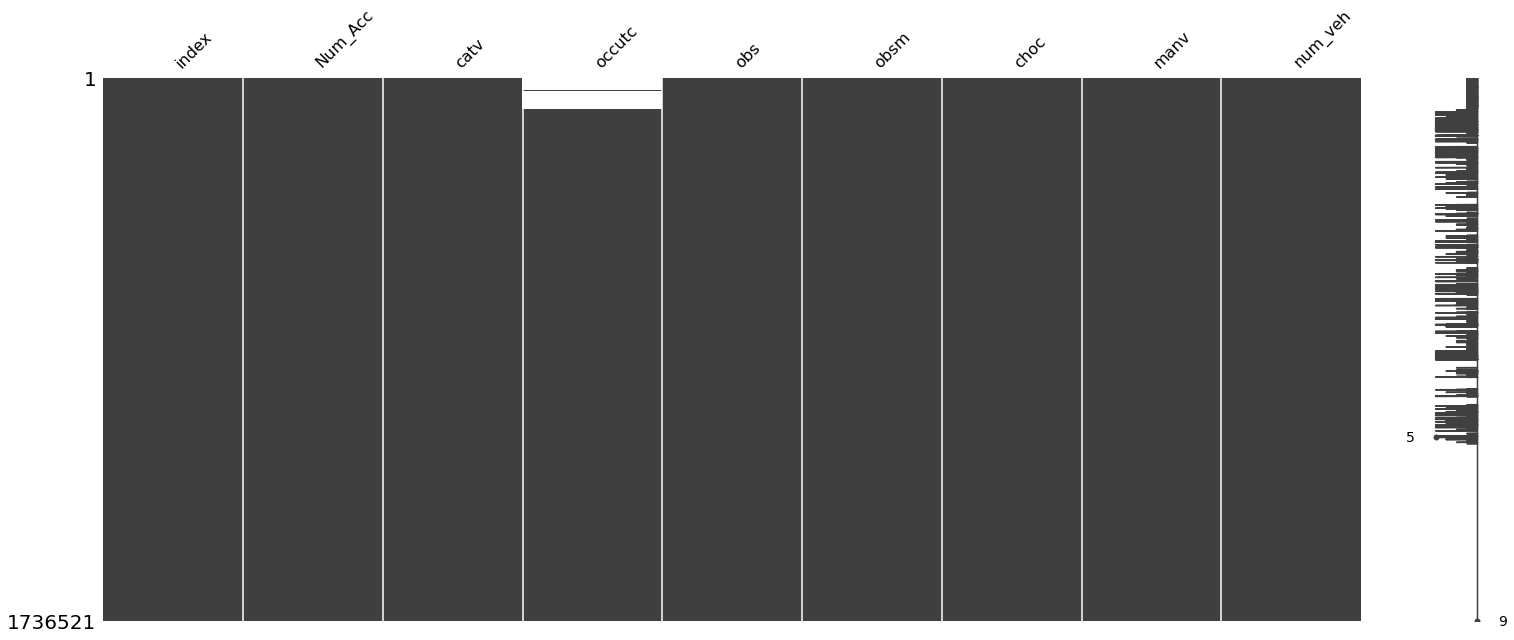

In [11]:
import missingno as msno
msno.matrix(vehicle)

<AxesSubplot:>

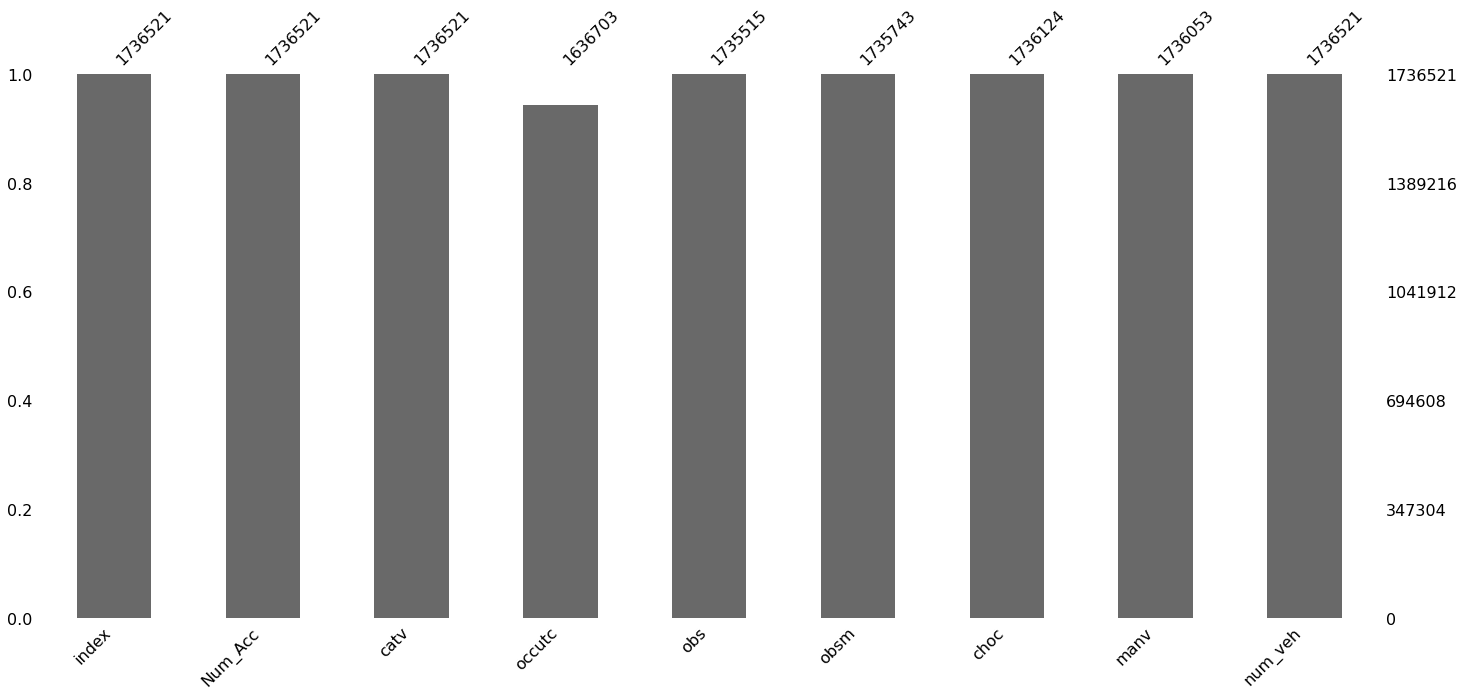

In [12]:
msno.bar(vehicle)

On peut déjà comprendre que les colonnes id_vehicule et motor contiennent trop de NaN pour pouvoir être exploitées. Nous allons donc les supprimer.

#### Étude des corrélations

<AxesSubplot:>

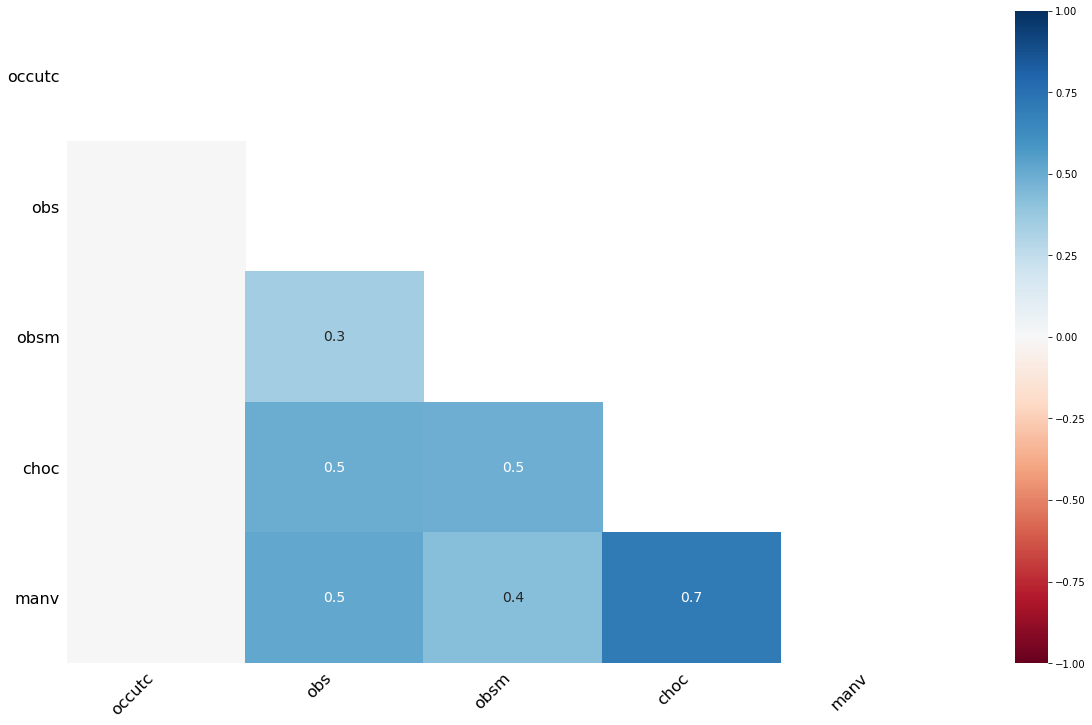

In [13]:
msno.heatmap(vehicle)

In [14]:
#suppression de motor et id_vehicle 

In [15]:
vehicle1 = vehicle.drop(columns=['id_vehicule', 'motor'])
vehicle1

KeyError: "['id_vehicule' 'motor'] not found in axis"

#### Categories les plus redondantes dans chaques colonnes

In [16]:
vehicle['num_veh'].value_counts()

A01     1003212
B01      493306
B02      128574
C01       55768
Z01       19572
         ...   
D56           1
F04           1
BC01          1
\01           1
Y51           1
Name: num_veh, Length: 155, dtype: int64

In [17]:
vehicle['choc'].value_counts()
#les chocs avant sont majoriataires

 1.0    640033
 3.0    249510
 2.0    202183
 4.0    163795
 8.0    127095
 0.0    115718
 7.0    106208
 6.0     58315
 5.0     45907
 9.0     27315
-1.0        45
Name: choc, dtype: int64

In [18]:
vehicle['obs'].value_counts()
#le fait qu'il n'y ai pas d'obstacle est majoriataire (la plus part des accidents doivent surement se passer entre deux véhicules direct sans intervention d'obstacle)

 0.0     1507764
 1.0       37785
 13.0      29242
 2.0       24897
 4.0       20088
 3.0       19644
 6.0       19137
 8.0       18112
 14.0      12772
 12.0       9958
 16.0       9454
 15.0       8280
 9.0        5682
 11.0       4114
 7.0        3978
 5.0        2410
 10.0       2023
 17.0        134
-1.0          41
Name: obs, dtype: int64

In [19]:
vehicle_numeric =vehicle1.drop(columns=['Num_Acc', 'num_veh'])

NameError: name 'vehicle1' is not defined

In [ ]:
liste = []

for i in vehicle_numeric.columns:

    a = vehicle1[i].value_counts().head(1)
    a1 = a.index.values

    for e in a1:
        liste.append(e)

print(len(liste))

In [ ]:
len(vehicle_numeric.columns)

In [ ]:
liste

In [ ]:
column = list(vehicle_numeric.columns)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=column, y=liste, palette="Reds_r")
plt.xlabel('\nFeatures', fontsize=15, color='#c0392b')
plt.ylabel("N° de situation\n", fontsize=15, color='#c0392b')
plt.title("Situations les plus fréquentes\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation=45)
plt.tight_layout()


Le sens de circulation est principalement inconnu.
Le vehicule utilisé est plus souvent une voiture (VL). Occutc defini le nombre d'occupant dans un transport en commun étant donné que la voiture est majoritaire, l'occutc est principalement égal a none ou 0.
Obs et obsm sont les obstacles statiques et mobiles, étant donné que c est principalement l'obsm qui est majoritaire, l'obs majoriatire est égal à 0, obsm est égal donc à 2 ce qui dit que la collision a le plus souvent lieu entre deux vl.
Le choc est principalement frontal .
La manoeuvre avant accident est généralement sans changement de direction .

In [ ]:
vehicle_propre = vehicle1.drop(columns='senc')
vehicle_propre

In [ ]:
vehicle_propre['occutc'].value_counts()



In [ ]:
vehicle_propre[vehicle_propre['catv']== 37]['occutc'].value_counts()

In [ ]:
print(f"Sur 1 736 521 ligne il y a {vehicle_propre['Num_Acc'].nunique()} numéro d'accident unique")

Il serait donc interressant de savoir s'il n'y aurait pas de doublons


#### Étude des doublons

In [ ]:
dbl = pd.DataFrame(vehicle_propre.duplicated())

In [ ]:
dbl.columns = ['doublons']

In [ ]:
doublon = dbl[dbl['doublons']== True].count()
print(f'il y a {int(doublon)} doublons')

#### Ajout dans la db

In [24]:
vehicle_propre.to_sql('vehicules', conn)

NameError: name 'vehicle_propre' is not defined

In [13]:
df_hugo = pd.read_sql('SELECT * FROM vehicules;', conn)

## Concatenation de nos dataframes

In [14]:
df_pierre = pd.read_csv('usagers (2).csv')

/Users/hugofugeray/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
df_pierre

,Unnamed: 0,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,an_nais,num_veh
0,0,201900000001,2.0,2,4,2,9.0,1.0,0.0,0,2002.0,B01
1,1,201900000001,1.0,1,4,2,5.0,1.0,0.0,0,1993.0,B01
2,2,201900000001,1.0,1,1,1,9.0,1.0,0.0,0,1959.0,A01
3,3,201900000002,1.0,1,4,2,1.0,1.0,0.0,0,1994.0,A01
4,4,201900000003,1.0,1,1,1,4.0,1.0,0.0,0.0,1996.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
2275167,2275167,200500087953,1.0,1,1,1,5.0,3.0,0.0,0,1972.0,B01
2275168,2275168,200500087953,1.0,1,1,1,5.0,3.0,0.0,0,1965.0,C01
2275169,2275169,200500087953,1.0,1,4,1,5.0,3.0,0.0,0,1990.0,A01
2275170,2275170,200500087954,1.0,1,4,1,1.0,3.0,0.0,0,1951.0,A01


In [16]:
df_pierre.drop(columns='Unnamed: 0', inplace = True)

In [17]:
df_hugo

,index,Num_Acc,catv,occutc,obs,obsm,choc,manv,num_veh
0,0,201900000001,7,NaN,0.0,2.0,5.0,23.0,B01
1,1,201900000001,17,NaN,1.0,0.0,3.0,11.0,A01
2,2,201900000002,7,NaN,4.0,0.0,1.0,0.0,A01
3,3,201900000003,7,NaN,0.0,2.0,1.0,2.0,A01
4,4,201900000003,7,NaN,1.0,0.0,4.0,2.0,B01
...,...,...,...,...,...,...,...,...,...
1736516,1736516,200500087952,7,0.0,0.0,2.0,3.0,1.0,A01
1736517,1736517,200500087953,7,0.0,0.0,2.0,3.0,19.0,B01
1736518,1736518,200500087953,2,0.0,0.0,2.0,1.0,17.0,A01
1736519,1736519,200500087953,7,0.0,0.0,2.0,1.0,1.0,C01


In [18]:
df_hugo.drop(columns='index', inplace=True)

#### Ajout de la table usagers

In [19]:
df_pierre_hugo = pd.merge(df_pierre, df_hugo,on = ['Num_Acc','num_veh'])

##### Étude des NaN

<AxesSubplot:>

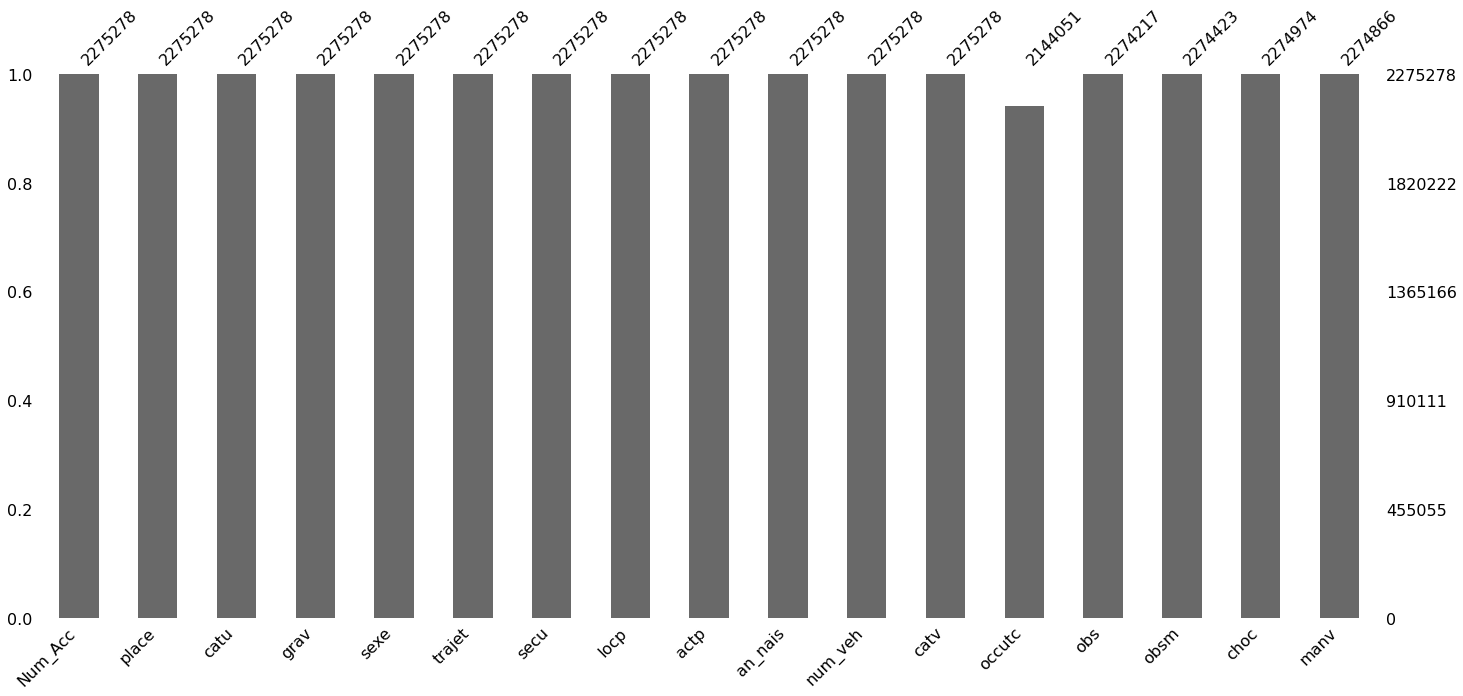

In [20]:
import missingno as msno
msno.bar(df_pierre_hugo)


In [21]:
df_pierre_hugo.tail(10)

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,an_nais,num_veh,catv,occutc,obs,obsm,choc,manv
2275268,200500087951,3.0,2,4,2,9.0,3.0,0.0,0,1972.0,A01,5,0.0,0.0,2.0,1.0,17.0
2275269,200500087951,1.0,1,1,1,5.0,3.0,0.0,0,1967.0,B01,7,0.0,0.0,2.0,3.0,15.0
2275270,200500087952,1.0,1,1,1,5.0,3.0,0.0,0,1968.0,A01,7,0.0,0.0,2.0,3.0,1.0
2275271,200500087952,2.0,2,4,2,4.0,3.0,0.0,0,1957.0,A01,7,0.0,0.0,2.0,3.0,1.0
2275272,200500087952,1.0,1,4,2,5.0,3.0,0.0,0,1975.0,B01,7,0.0,0.0,2.0,2.0,1.0
2275273,200500087953,1.0,1,1,1,5.0,3.0,0.0,0,1972.0,B01,7,0.0,0.0,2.0,3.0,19.0
2275274,200500087953,1.0,1,1,1,5.0,3.0,0.0,0,1965.0,C01,7,0.0,0.0,2.0,1.0,1.0
2275275,200500087953,1.0,1,4,1,5.0,3.0,0.0,0,1990.0,A01,2,0.0,0.0,2.0,1.0,17.0
2275276,200500087954,1.0,1,4,1,1.0,3.0,0.0,0,1951.0,A01,7,0.0,4.0,0.0,0.0,1.0
2275277,200500087954,2.0,2,4,2,5.0,3.0,0.0,0,1946.0,A01,7,0.0,4.0,0.0,0.0,1.0


##### Étude des doublons

In [22]:
dbl_df = pd.DataFrame(df_pierre_hugo.duplicated())

In [23]:
dbl_df.columns = ['doublons']

In [24]:
doublon = dbl_df[dbl_df['doublons']== True].count()
print(f'il y a {int(doublon)} doublons')

il y a 1831 doublons


In [25]:
df_pierre.drop_duplicates(inplace=True)

#### Ajout de la table caractéristiques

In [26]:
df_nina = pd.read_csv('caracteristique_2005_2019.csv')

/Users/hugofugeray/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
df_nina

,Num_Acc,jour,mois,an,hrmn,lum,dep,agg,int,atm,col,lat,long,weekday
0,201900000001,30,11,2019,01:30,4,93,1,1,1.0,2.0,48.896210,2.470120,5
1,201900000002,30,11,2019,02:50,3,93,1,1,1.0,6.0,48.930700,2.368800,5
2,201900000003,28,11,2019,15:15,1,92,1,1,1.0,4.0,48.935872,2.319174,3
3,201900000004,30,11,2019,20:20,5,94,1,1,1.0,4.0,48.817329,2.428150,5
4,201900000005,30,11,2019,04:00,3,94,1,1,1.0,2.0,48.776362,2.433254,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017304,200500087950,21,12,2005,2035,5,RE,2,2,1.0,3.0,NaN,NaN,2
1017305,200500087951,23,12,2005,1010,1,RE,2,1,1.0,3.0,NaN,NaN,4
1017306,200500087952,26,12,2005,1715,1,RE,2,2,1.0,3.0,NaN,NaN,0
1017307,200500087953,27,12,2005,1500,1,RE,2,3,2.0,5.0,NaN,NaN,1


In [28]:
df_pierre_hugo_nina = pd.merge(df_pierre_hugo, df_nina,on = 'Num_Acc')

In [29]:
df_pierre_hugo_nina

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,an_nais,...,hrmn,lum,dep,agg,int,atm,col,lat,long,weekday
0,201900000001,2.0,2,4,2,9.0,1.0,0.0,0,2002.0,...,01:30,4,93,1,1,1.0,2.0,48.896210,2.470120,5
1,201900000001,1.0,1,4,2,5.0,1.0,0.0,0,1993.0,...,01:30,4,93,1,1,1.0,2.0,48.896210,2.470120,5
2,201900000001,1.0,1,1,1,9.0,1.0,0.0,0,1959.0,...,01:30,4,93,1,1,1.0,2.0,48.896210,2.470120,5
3,201900000002,1.0,1,4,2,1.0,1.0,0.0,0,1994.0,...,02:50,3,93,1,1,1.0,6.0,48.930700,2.368800,5
4,201900000003,1.0,1,1,1,4.0,1.0,0.0,0.0,1996.0,...,15:15,1,92,1,1,1.0,4.0,48.935872,2.319174,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275273,200500087953,1.0,1,1,1,5.0,3.0,0.0,0,1972.0,...,1500,1,RE,2,3,2.0,5.0,NaN,NaN,1
2275274,200500087953,1.0,1,1,1,5.0,3.0,0.0,0,1965.0,...,1500,1,RE,2,3,2.0,5.0,NaN,NaN,1
2275275,200500087953,1.0,1,4,1,5.0,3.0,0.0,0,1990.0,...,1500,1,RE,2,3,2.0,5.0,NaN,NaN,1
2275276,200500087954,1.0,1,4,1,1.0,3.0,0.0,0,1951.0,...,2100,5,RE,2,1,2.0,7.0,NaN,NaN,5


Le nombre de lignes n'a pas changé, on en déduit que le merge s'est éffectué avec succès

##### Étude des NaN

<AxesSubplot:>

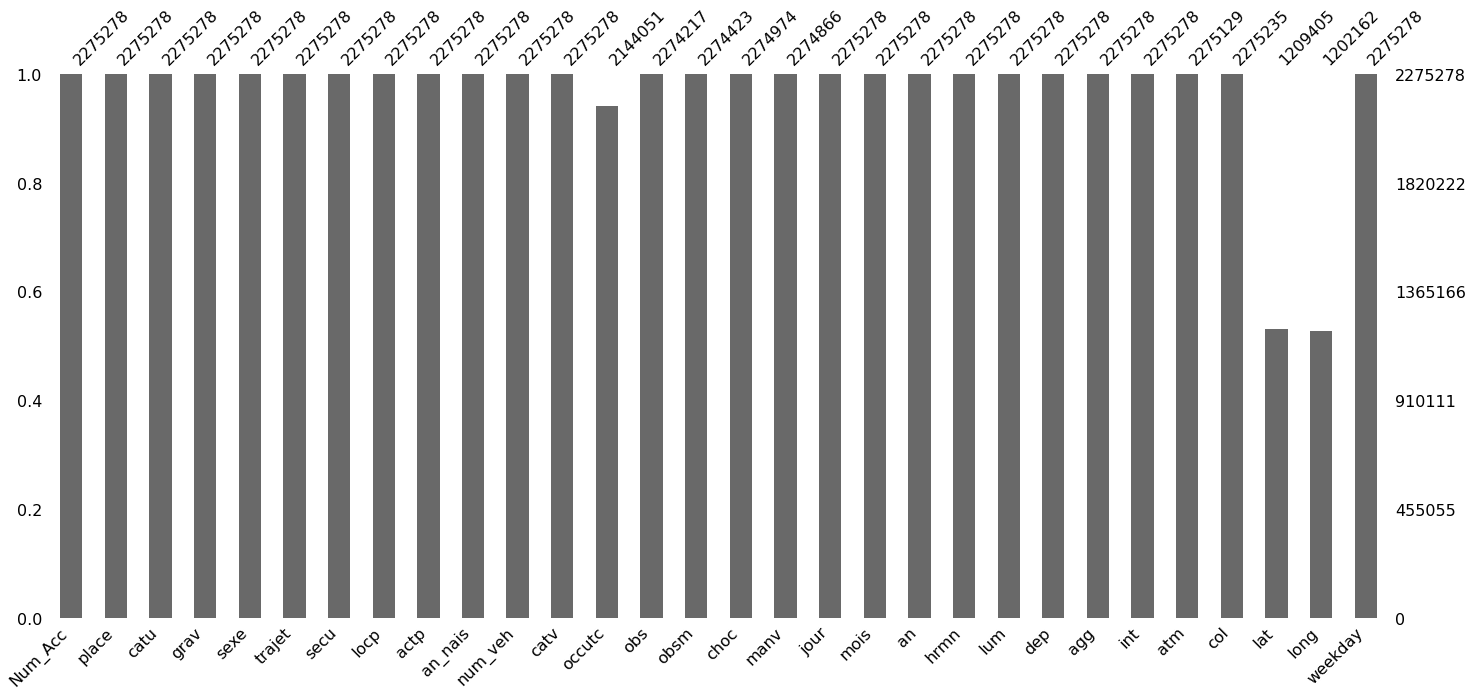

In [30]:
msno.bar(df_pierre_hugo_nina)

In [31]:
df_pierre_hugo_nina.columns

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'an_nais', 'num_veh', 'catv', 'occutc', 'obs', 'obsm', 'choc',
       'manv', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'agg', 'int', 'atm',
       'col', 'lat', 'long', 'weekday'],
      dtype='object')

##### Ajout dans la db

In [32]:
df_pierre.to_sql('usagers',conn, if_exists = 'replace')

In [33]:
df_lieux = pd.read_csv('lieux_2005_2019.csv')

/Users/hugofugeray/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
df_lieux

,Num_Acc,catr,voie,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ
0,201900000001,1.0,3.0,3.0,10.0,6.0,900.0,0,1.0,2.0,0.0,0.0,1.0,2.0,1.0
1,201900000002,1.0,1.0,1.0,2.0,3.0,845.0,0,4.0,2.0,0.0,0.0,1.0,0.0,1.0
2,201900000003,1.0,86.0,3.0,8.0,10.0,500.0,0,1.0,3.0,0.0,0.0,1.0,0.0,1.0
3,201900000004,1.0,4.0,3.0,5.0,2.0,299.0,0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,201900000005,1.0,86.0,1.0,3.0,41.0,0.0,0,1.0,3.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016546,200500087950,4.0,0,2.0,3.0,-1.0,-1.0,0,1.0,1.0,0.0,80.0,1.0,0.0,1.0
1016547,200500087951,4.0,0,2.0,2.0,-1.0,-1.0,0,1.0,2.0,0.0,70.0,1.0,0.0,1.0
1016548,200500087952,4.0,0,1.0,2.0,-1.0,-1.0,0,1.0,1.0,0.0,75.0,1.0,0.0,1.0
1016549,200500087953,4.0,0,2.0,0.0,-1.0,-1.0,0,1.0,1.0,0.0,150.0,1.0,0.0,1.0


In [35]:
df_final = pd.merge(df_pierre_hugo_nina, df_lieux, left_on='Num_Acc', right_on='Num_Acc')

In [36]:
df_final

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,an_nais,...,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ
0,201900000001,2.0,2,4,2,9.0,1.0,0.0,0,2002.0,...,6.0,900.0,0,1.0,2.0,0.0,0.0,1.0,2.0,1.0
1,201900000001,1.0,1,4,2,5.0,1.0,0.0,0,1993.0,...,6.0,900.0,0,1.0,2.0,0.0,0.0,1.0,2.0,1.0
2,201900000001,1.0,1,1,1,9.0,1.0,0.0,0,1959.0,...,6.0,900.0,0,1.0,2.0,0.0,0.0,1.0,2.0,1.0
3,201900000002,1.0,1,4,2,1.0,1.0,0.0,0,1994.0,...,3.0,845.0,0,4.0,2.0,0.0,0.0,1.0,0.0,1.0
4,201900000003,1.0,1,1,1,4.0,1.0,0.0,0.0,1996.0,...,10.0,500.0,0,1.0,3.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273541,200500087953,1.0,1,1,1,5.0,3.0,0.0,0,1972.0,...,-1.0,-1.0,0,1.0,1.0,0.0,150.0,1.0,0.0,1.0
2273542,200500087953,1.0,1,1,1,5.0,3.0,0.0,0,1965.0,...,-1.0,-1.0,0,1.0,1.0,0.0,150.0,1.0,0.0,1.0
2273543,200500087953,1.0,1,4,1,5.0,3.0,0.0,0,1990.0,...,-1.0,-1.0,0,1.0,1.0,0.0,150.0,1.0,0.0,1.0
2273544,200500087954,1.0,1,4,1,1.0,3.0,0.0,0,1951.0,...,76.0,0.0,0,1.0,2.0,20.0,75.0,2.0,0.0,1.0


<AxesSubplot:>

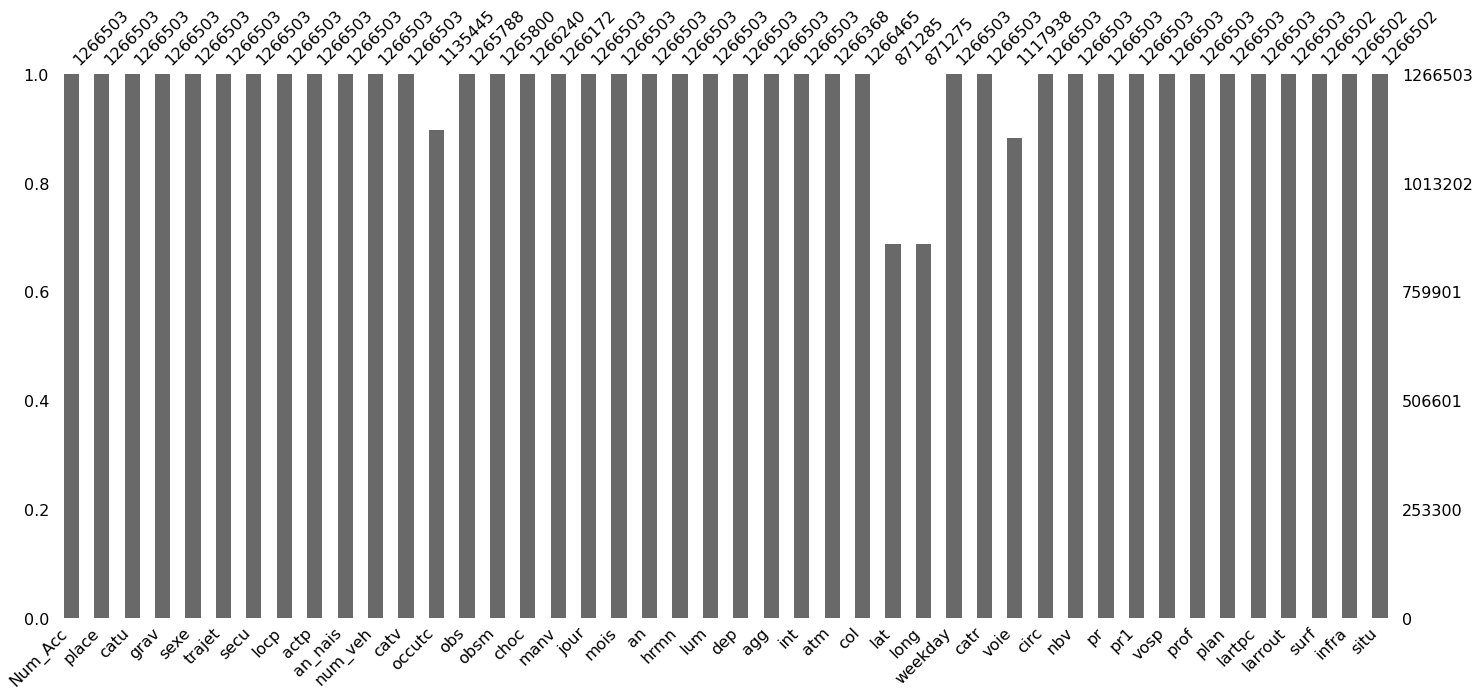

In [55]:
msno.bar(df_final)

In [56]:
dbl_df_final = pd.DataFrame(df_final.duplicated())
dbl_df_final.columns = ['doublons']
doublon_fin = dbl_df_final[dbl_df_final['doublons']== True].count()
print(f'il y a {int(doublon_fin)} doublons')

il y a 1045 doublons


In [59]:
dbl_df_final[dbl_df_final['doublons']== True]

,doublons
419,True
1331,True
8577,True
10096,True
12663,True
...,...
1257747,True
1262628,True
1264204,True
1264895,True


In [60]:
df_final.drop_duplicates(inplace=True)

In [61]:
dbl_df_final = pd.DataFrame(df_final.duplicated())
dbl_df_final.columns = ['doublons']
doublon_fin = dbl_df_final[dbl_df_final['doublons']== True].count()
print(f'il y a {int(doublon_fin)} doublons')

il y a 0 doublons


In [62]:
df_final.columns

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secu', 'locp',
       'actp', 'an_nais', 'num_veh', 'catv', 'occutc', 'obs', 'obsm', 'choc',
       'manv', 'jour', 'mois', 'an', 'hrmn', 'lum', 'dep', 'agg', 'int', 'atm',
       'col', 'lat', 'long', 'weekday', 'catr', 'voie', 'circ', 'nbv', 'pr',
       'pr1', 'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra',
       'situ'],
      dtype='object')

In [63]:
df_final.grav

0          4
1          4
2          1
3          4
4          1
          ..
1266498    1
1266499    1
1266500    3
1266501    3
1266502    4
Name: grav, Length: 1265458, dtype: int64

In [64]:
y = df_final.grav

<AxesSubplot:xlabel='grav', ylabel='Count'>

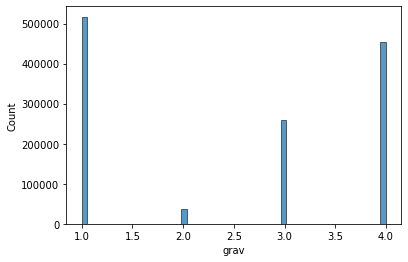

In [65]:
sns.histplot(y)

In [67]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265458 entries, 0 to 1266502
Data columns (total 44 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Num_Acc  1265458 non-null  int64  
 1   place    1265458 non-null  float64
 2   catu     1265458 non-null  int64  
 3   grav     1265458 non-null  int64  
 4   sexe     1265458 non-null  int64  
 5   trajet   1265458 non-null  float64
 6   secu     1265458 non-null  float64
 7   locp     1265458 non-null  float64
 8   actp     1265458 non-null  object 
 9   an_nais  1265458 non-null  float64
 10  num_veh  1265458 non-null  object 
 11  catv     1265458 non-null  int64  
 12  occutc   1134449 non-null  float64
 13  obs      1264743 non-null  float64
 14  obsm     1264756 non-null  float64
 15  choc     1265195 non-null  float64
 16  manv     1265127 non-null  float64
 17  jour     1265458 non-null  int64  
 18  mois     1265458 non-null  int64  
 19  an       1265458 non-null  int64  
 20  hr

In [68]:
features = df[['place','catu','trajet','secu','locp','actp','catv','occutc']]

KeyboardInterrupt: 